### Supplementary Information for Programming Cell-Free Biosensors with DNA Strand Displacement Circuits

Jaeyoung K. Jung$^{1,2,3}$, Chloé M. Archuleta$^{1,2,3}$, Khalid K. Alam$^{1,2,3,4}$ and Julius B. Lucks$^{1,2,3,4,5,*}$

1 – Department of Chemical and Biological Engineering, Northwestern University (Evanston IL, USA)<br>
2 – Center for Synthetic Biology, Northwestern University (Evanston, IL, USA)<br>
3 – Center for Water Research, Northwestern University (Evanston, IL, USA)<br>
4 – Stemloop, Inc. (Evanston, IL, USA)<br>
5 – Interdisciplinary Biological Sciences Graduate Program, Northwestern University (Evanston, IL, USA)<br>
*correspondence: jblucks@northwestern.edu <br> 

### ODE Model of ROSALIND-TMSD NOT Gate for Zinc


Using the kinetics rates of RNAP-DNA binding, SmtB-smtO binding, SmtB-Zn binding, and toehold-mediated strand displacmenet, simulate ROSALIND-TMSD Reactions<br>

**Reactant Species:**<br>

D_unreg - Unregulated DNA template <br>
D_smtO - Regulated DNA template with smtO operator sequence <br>
RNAP - T7 RNAP <br>
RD_unreg - T7 RNAP and unregulated DNA template bound complex <br>
RD_smtO - T7 RNAP and smtO-regulated DNA template bound complex <br>
SmtB - unbound, free SmtB tetramer <br>
SmtBD - SmtB tetramer bound to one smtO <br>
Zn - unbound, free Zn ions <br>
SmtB_Zn - one Zn ion bound to SmtB tetramer <br>
InvR_U - transcribed invading RNA strand from unregulated template <br>
InvR_S - transcribed invading RNA strand from smtO template <br>
Gated_S - InvR_S and InvR_U bound complex <br>
SD - fluorescent DNA strand from signal gate <br>
Q - InvadeR and FAM heteroduplex <br>
RQ - signal gate <br>

**Assumptions:**<br>

- Thermodyanmics are modeled, but not individual base pairs/amino acids dynamics themselves
- One-to-one binding of T7 RNAP and T7 promoter on the DNA template
- One-to-one binding of SmtB tetramer and smtO on the DNA template
- One-to-one binding of SmtB tetramer and a Zn ion
- SmtB tetramer can be bound to either smtO on the DNA template or Zn, but not both.
- All TMSD reactions are irreversible.
- Fraying within each gate is ignored.
<br>

**Reactions:**<br>

$$\underline{\text{Unregulated Template}}$$
<br>
$$RNAP + D_{unreg} \xrightarrow[\text{k_unbind}]{\text{k_bind}} RD_{unreg}$$
<br>
<br>
$$RD_{unreg} \xrightarrow[\text{}]{\text{k_m_unreg}} InvR_{U} + RNAP + D_{unreg}$$
<br>
<br>

$$\underline{\text{smtO-Regulated Template}}$$
<br>
$$SmtB + D_{smtO} \xrightarrow[\text{k_derep_S}]{\text{k_rep_S}} SmtBD$$
<br>
<br>
$$SmtB + Zn \xrightarrow[\text{k_unin_S}]{\text{k_ind_S}} SmtB-Zn$$
<br>
<br>
$$RNAP + D_{smtO} \xrightarrow[\text{k_unbind}]{\text{k_bind}} RD_{smtO}$$
<br>
<br>
$$RD_{smtO} \xrightarrow[\text{}]{\text{k_m_smtO}} InvR_S + RNAP + D_{smtO}$$
<br>
<br>

$$\underline{\text{Strand Displacements}}$$
<br>
$$InvR_S + InvR_U \xrightarrow[\text{}]{\text{k_SD_NOT}} Gated_{S}$$
<br>
<br>
$$InvR_{U} + RQ \xrightarrow[\text{}]{\text{k_SD_mis}} SD + Q$$
<br>
<br>

### Importing packages: 

In [1]:
import matplotlib
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt
import csv 
import pandas as pd

### Setting the time range to run the simulation for:

In [2]:
t_start = 0
t_step = 2.
t_stop = 121.
t = np.arange(t_start,t_stop,t_step)

### Write out the set of ODEs to solve:

$$d[RNAP] = k_{unbind}[RD_{smtO}] - k_{bind}[D_{smtO}][RNAP] + k_{m,smtO}[RD_{smtO}] + k_{unbind}[RD_{unreg}] - k_{bind}[D_{unreg}][RNAP] + k_{m_unreg}[RD_{unreg}]$$

$$d[D_{unreg}] = k_{unbind}[RD_{unreg}] - k_{bind}[D_{unreg}][RNAP] + k_{m,unreg}[RD_{unreg}]$$

$$d[D_{smtO}] = k_{unbind}[RD_{smtO}] - k_{bind}[D_{smtO}][RNAP] + k_{derep_S}[SmtBD] - k_{rep_S}[SmtB][D_{smtO}] + k_{m,smtO}[RD_{smtO}]$$

$$d[SmtB] = k_{derep_S}[SmtBD] - k_{rep_S}[D_{smtO}][SmtB] - k_{ind_S}[SmtB][Zn] + k_{unin_S}[SmtB-Zn]$$

$$d[SmtBD] = k_{rep_S}[D_{smtO}][SmtB] - k_{derep_S}[SmtBD]$$

$$d[Zn] = k_{unin_S}[SmtB-Zn] - k_{ind_S}[SmtB][Zn]$$

$$d[SmtB-Zn] = k_{ind_S}[SmtB][Zn] - k_{unin_S}[SmtB-Zn]$$

$$d[RD_{smtO}] = k_{bind}[D_{smtO}][RNAP] - k_{unbind}[RD_{smtO}] - k_{m,smtO}[RD_{smtO}]$$

$$d[RD_{unreg}] = k_{bind}[D_{unreg}][RNAP] - k_{unbind}[RD_{unreg}] - k_{m,unreg}[RD_{unreg}]$$

$$d[InvR_S] = k_{m,smtO}[RD_{smtO}] - k_{SD-NOT}[InvR_U][InvR_S]$$

$$d[InvR_U] = k_{m,unreg}[RD_{unreg}] - k_{SD-NOT}[InvR_S][InvR_U] - k_{SD-mis}[InvR_U][RQ]$$

$$d[Gated_S] = k_{SD-NOT}[InvR_S][InvR_U]$$

$$d[SD] = k_{SD-mis}[RQ][InvR_U]$$

$$d[Q] = d[SD]$$

$$d[RQ] = -d[SD]$$

In [3]:
def dy(y,t,params):
    [D_smtO, D_unreg, RNAP, RD_smtO, RD_unreg, SmtB, SmtBD, Zn, SmtB_Zn, InvR_S, SD, Gated_S, Q, RQ, InvR_U] = y
    k_m_smtO, k_m_unreg, k_bind, k_unbind, k_SD_mis, k_SD_NOT, k_rep_S, k_derep_S, k_ind_S, k_unin_S = params
    
    dD_smtO = k_unbind*RD_smtO - k_bind*D_smtO*RNAP + k_derep_S*SmtBD - k_rep_S*D_smtO*SmtB + k_m_smtO*RD_smtO 
    dD_unreg = k_unbind*RD_unreg - k_bind*D_unreg*RNAP + k_m_unreg*RD_unreg
    dRNAP = k_unbind*RD_smtO - k_bind*D_smtO*RNAP + k_m_smtO*RD_smtO + k_unbind*RD_unreg - k_bind*D_unreg*RNAP + k_m_unreg*RD_unreg 
    dRD_smtO = k_bind*D_smtO*RNAP - k_unbind*RD_smtO - k_m_smtO*RD_smtO 
    dRD_unreg = k_bind*D_unreg*RNAP - k_unbind*RD_unreg - k_m_unreg*RD_unreg
    dSmtB = k_derep_S*SmtBD - k_rep_S*D_smtO*SmtB - k_ind_S*SmtB*Zn + k_unin_S*SmtB_Zn
    dSmtBD = k_rep_S*D_smtO*SmtB - k_derep_S*SmtBD
    dZn = k_unin_S*SmtB_Zn - k_ind_S*SmtB*Zn
    dSmtB_Zn = k_ind_S*SmtB*Zn - k_unin_S*SmtB_Zn
    dInvR_S = k_m_smtO*RD_smtO - k_SD_NOT*InvR_S*InvR_U
    dSD = k_SD_mis*RQ*InvR_U 
    dGated_S = k_SD_NOT*InvR_S*InvR_U
    dQ = dSD 
    dRQ = -dSD
    dInvR_U = k_m_unreg*RD_unreg - k_SD_NOT*InvR_S*InvR_U - k_SD_mis*InvR_U*RQ
    
    diff = [dD_smtO, dD_unreg, dRNAP, dRD_smtO, dRD_unreg, dSmtB, dSmtBD, dZn, dSmtB_Zn, dInvR_S, dSD, dGated_S, dQ, dRQ, dInvR_U]
    
    return diff

### Setting the parameters:


$$k_{m,smtO} = 0.05 /\mu M\text{-sec (note a)} \qquad$$
<br>
$$k_{m,unreg} = 0.04 /\mu M\text{-sec (note a)} \qquad$$
<br>
$$k_{bind} = 56 /\mu M\text{-sec} \qquad k_{unbind} = 0.2 \text{/sec [3]}$$
<br>
$$k_{SD-mis} = 0.004 /\mu M\text{-sec (note b)}\qquad k_{SD-NOT} = 0.08 /\mu M\text{-sec (note c)}\qquad$$
<br>
$$k_{rep,S} = 3.0 /\mu M\text{-sec} \qquad k_{derep,S} = 0.18 \text{/sec [4]}$$
<br>
$$k_{ind,S} = 80 /\mu M\text{-sec} \qquad k_{unin,S} = 0.01 \text{/sec [note d]}$$
<br>

**References:**<br>

[1] McClure, W. R., Rate-limiting steps in RNA chain initiation. PNAS, 1980. 77(10):
p.5634-8.

[2] Conrad, T., et al., Maximizing transcription of nucleic acids with efficient T7 promoters.
Commun. Biol., 2020. 3(1):p. 439.

[3] Ujvari, A. *et al.* "Thermodynamics and kinetic measurements of promoter biding by T7 RNA polymerase." *Biochemistry.* (1996).

[4] Busenlehner, L. S. *et al.* "The SmtB/ArsR family of metalloregulatory transcriptional repressors: structural insights into prokaryotic metal resistance." *FEMS Microbiology Reviews.* (2003).

[5] Srinivas, N., et al., On the biophysics and kinetics of toehold-mediated DNA strand
displacement. Nucleic Acids Research, 2013. 41(22): p.10641-58

[6] VanZile, M. L., et al., Structural characterization of distinct a3N and a5 metal sites
in the cyanobacterial zinc sensor SmtB. Biochemistry, 2002. 41(31): p.9765-75



**Notes:**<br>

(a) The transcription rate of k_{m,smtO} is estimated to be 2 times slower than that of k_{m,tetO} [1] because the initially transcribed nucleotides have a slower transcriptional efficiency due to sequence [2]. The transcription rate of k_{m,unreg} is estimated to be 2.5 times slower, because the initial nucleotides are even less effecient than that of the smtO-regulated sequence.  

(b) The estimated strand displacement rate for a 4-nt toehold is 0.04 /uM-sec [5]. To account for the energetic penalty from the encoded basepair mismatch between the unregulated transcript and the signal gate, we estimate a roughly 10-fold reduction in strand displacement rate as a result. 

(c) The regulated RNA transcript encodes the matching base pair that the unregulated transcript lacks, so we estimate a roughly 2-fold increase in strand displacement rate as a result. 

(d) These values were estimated from [6].

In [4]:
k_m_smtO = 0.1*60./2 # /min
k_m_unreg = 0.1*60./2.5 # /min
k_bind = 56.*60. # /uM-min
k_unbind = 0.20*60. # /min
k_SD_mis = 0.04*60./10. # /uM-min 
k_SD_NOT = 0.04*60.*2. # /uM-min
k_rep_S = 3.00*60. # /uM-min
k_derep_S = 0.18*60. # /min
k_ind_S = 80.*60. # /uM-min
k_unin_S = 0.1*60. # /min

### Setting the experimental initial conditions: 

In [5]:
D_smtO_0 = 0.05 # uM
D_unreg_0 = 0.025 # uM
RNAP_0 = 0.1 # uM
RD_smtO_0 = 0.0 # uM
RD_unreg_0 = 0.0 # uM
SmtB_0 = 7.5 # uM
SmtBD_0 = 0.0 # uM
SmtB_Zn_0 = 0.0 # uM
InvR_S_0 = 0.0 # uM
RQ_0 = 5.0 # uM
SD_0 = 0.0 # uM
Q_0 = 0.0 # uM
InvR_U_0 = 0.0 # uM
Gated_S_0 = 0.0 # uM

### Solving the equations:

In [6]:
# Defining the without input condition:

Zn_0 = 0.0 # uM

# Running the ODE solver:
y_0 = [D_smtO_0, D_unreg_0, RNAP_0, RD_smtO_0, RD_unreg_0, SmtB_0, SmtBD_0, Zn_0, SmtB_Zn_0, InvR_S_0, SD_0, Gated_S_0, Q_0, RQ_0, InvR_U_0]
params = k_m_smtO, k_m_unreg, k_bind, k_unbind, k_SD_mis, k_SD_NOT, k_rep_S, k_derep_S, k_ind_S, k_unin_S
y1 = spi.odeint(dy,y_0,t,args=(params,))

# Isolating desired output data:
ninput = y1[:,10] 

# Defining the with input condition:

Zn_0 = 30.0 # uM

# Running the ODE solver:
y_0 = [D_smtO_0, D_unreg_0, RNAP_0, RD_smtO_0, RD_unreg_0, SmtB_0, SmtBD_0, Zn_0, SmtB_Zn_0, InvR_S_0, SD_0, Gated_S_0, Q_0, RQ_0, InvR_U_0]
params = k_m_smtO, k_m_unreg, k_bind, k_unbind, k_SD_mis, k_SD_NOT, k_rep_S, k_derep_S, k_ind_S, k_unin_S
y2 = spi.odeint(dy,y_0,t,args=(params,))

# Isolating desired output data:
ZnSO4 = y2[:,10] 

### Plotting the result: 

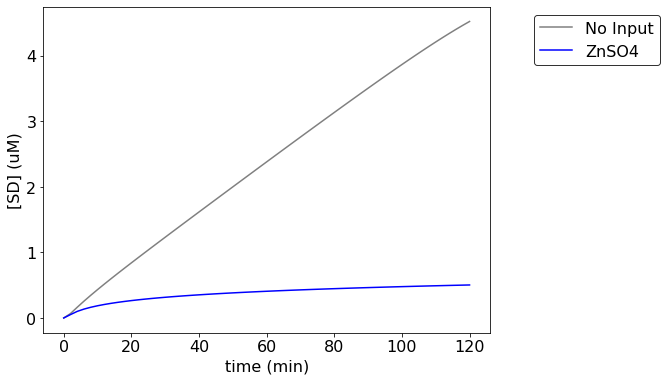

In [7]:
font = {'family' : 'sans serif',
            'weight' : 'normal',
            'size'   : 16}

plt.rc('font', **font)

fig, ax = plt.subplots(1, figsize=(8, 6))
ax.plot(t, ninput, color="grey", label="No Input")
ax.plot(t, ZnSO4, color="blue", label="ZnSO4")
plt.xlabel("time (min)")
plt.ylabel("[SD] (uM)")
plt.legend(bbox_to_anchor=(1.4, 1.0), loc="upper right", frameon=True, edgecolor = 'black')
plt.savefig('NOT_Zn', bbox_inches="tight")

### Saving the result to a csv file:

In [8]:
rows = zip(ninput,ZnSO4)
with open('NOT_Zn.csv', "w") as f:
    writer = csv.writer(f)
    for row in rows:
        writer.writerow(row)
        

df = pd.read_csv('NOT_Zn.csv', header=None)
df.rename(columns={0: 'No Input', 1: 'ZnSO4'}, inplace=True)
df.to_csv('NOT_Zn.csv', index=False)